I was recently helping a student with some preliminary concepts in isogemetric analysis (IGA) and after taking a look at his pure Python implementation of the Cox - de Boor algorithm for computing B-Spline basis functions, I decided to look around for a Numpy implementation that could possibly be a little faster.  While I found a few [B-spline implementations](https://github.com/scipy/scipy/blob/v0.15.1/scipy/signal/bsplines.py#L122) in Python, I thought I might be able to sqeeze out a little more performance through [vectorization](http://en.wikipedia.org/wiki/Array_programming) and [memoization](http://en.wikipedia.org/wiki/Memoization) while maintaining readablity of the code.  I think I have something that accomplishes that, in the context of how basis functions are needed and used in IGA.  The main portion of the code is here:

<script src="http://gist-it.sudarmuthu.com/https://github.com/johntfoster/bspline/blob/master/bspline.py?slice=47:107&footer=minimal"></script>

The full repository can be found/forked here: [johntfoster/bspline](https://github.com/johntfoster/bspline).

An example use case is shown below.  This reproduces Fig. 2.6 in [Isogeometric Analysis: Towards the integration of CAD and FEA](http://www.amazon.com/Isogeometric-Analysis-Toward-Integration-CAD/dp/0470748737/ref=sr_1_1?ie=UTF8&qid=1432735651&sr=8-1&keywords=isogeometric+analysis+toward+integration+of+cad+and+fea) by Contrell, Hughes, and Bazilevs.  With [bspline.py](https://github.com/johntfoster/bspline/blob/master/bspline.py) in the working directory:

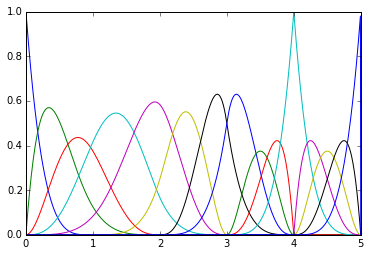

In [1]:
from bspline import Bspline

knot_vector = [0,0,0,0,0,1,2,2,3,3,3,4,4,4,4,5,5,5,5,5]
basis = Bspline(knot_vector,4)

%matplotlib inline
basis.plot()

As mentioned above the recursive function that computes the basis has been memoized such that it caches repeated evaluations of the function.  This has a large impact on the evaluation speed.  We can use [Jupyter](https://jupyter.org/)'s `%%timeit` magic function to investigate this.  I've hidden the raw evaluation functions through Python's name mangaling, therefore the following function is not intended for general API usage, but for testing purposes, let's evalute the basis functions defined by the knot vector and basis order given above using the non-memoized code:

In [2]:
import numpy as np
x = np.linspace(0,5,num=1000)

In [3]:
%%timeit 
[ basis._Bspline__basis(i, basis.p) for i in x ]

1 loops, best of 3: 192 ms per loop


Now let's time the memoized code

In [4]:
%%timeit 
[ basis(i) for i in x ]

100 loops, best of 3: 2.36 ms per loop


A speedup of roughly two orders of magnitude!